# Rappresentazione grafica tramite mappa e plot basata sui risultati ottenuti tramite l'algoritmo di clustering Ward.

## Setting delle path relative ai salvataggi

---

Per procedere alla rappresentazione grafica è necessario: 


*   Creare due cartelle su drive in cui salvare i grafici relativi alle mappe e ai plot.





```
path_1 = 'gdrive/MyDrive/Scala_Data/Map_graph/'
path_2 = 'gdrive/MyDrive/Scala_Data/Ward_plot/'
```

* Creare una cartella in cui inserire i file .CSV ottenuti su gcloud

```
path_0 = 'gdrive/MyDrive/Scala_Data/output3/'
```

In [ ]:
path_0 = "gdrive/MyDrive/Scala_Data/output3/"
path_1 = "gdrive/MyDrive/Scala_Data/Map_graph/"
path_2 = "gdrive/MyDrive/Scala_Data/Ward_plot/"



---



In [6]:
!pip install geopandas
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c3597ec24d40909b6d3c9c04748fec05bef5aa4fa8fb51e77fc006127ebc1ba0
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import seaborn as sns
colore = sns.color_palette("Set2",10)
colore

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

MAX LABEL  6
MAX LABEL  6
MAX LABEL  6
MAX LABEL  6
MAX LABEL  6
MAX LABEL  5
MAX LABEL  5
MAX LABEL  4
MAX LABEL  6
MAX LABEL  6
MAX LABEL  5
MAX LABEL  5
MAX LABEL  5
MAX LABEL  5
MAX LABEL  4
MAX LABEL  3
MAX LABEL  3
MAX LABEL  3
MAX LABEL  3


/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:673: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



MAX LABEL  3


<Figure size 432x288 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

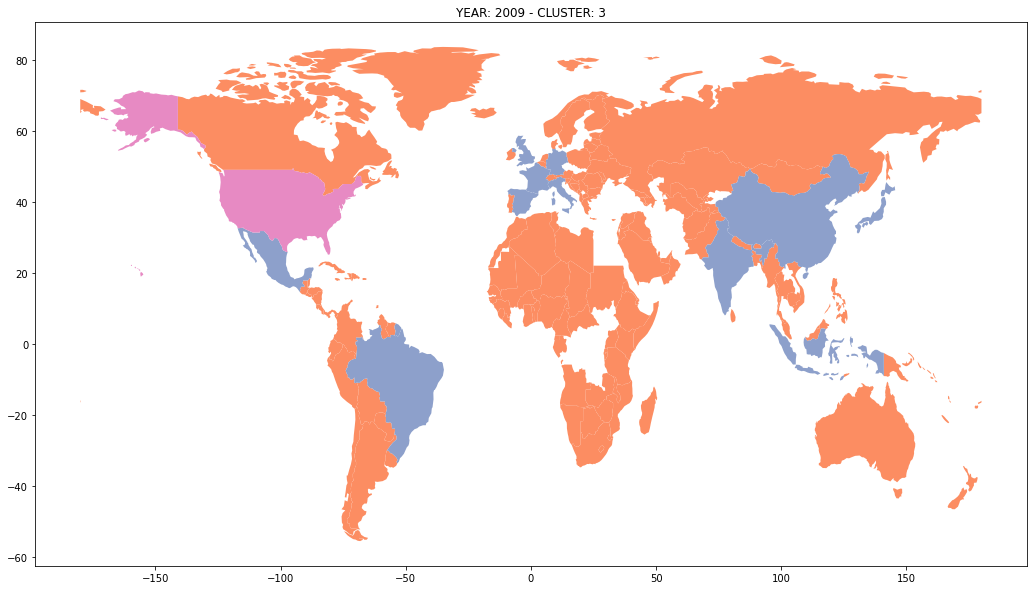

In [7]:
import os
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import plotly.express as px
import pycountry

#Conversione del nome della nazione con il suo codice alpha_3
def findCode (country_name):
  if pycountry.countries.get(name=country_name) != None:
    return pycountry.countries.get(name=country_name).alpha_3
  elif pycountry.countries.get(common_name=country_name)!= None:
    return pycountry.countries.get(common_name=country_name).alpha_3
  else:
    return ("not founded")


for i in range(1989,2010):
  year=str(i)
  #Ricerca dei file nella path di gdrive su cui leggere i csv 
  for path,dirs,files in sorted(os.walk(path_0+'csv_'+year)): 
    
    for f in files:
      if fnmatch.fnmatch(f, '*.csv'):
        plt.clf()
        plt.ion()
        path= path+"/"+f
        df=pd.read_csv(path)

        #caricamento del dataframe di geopandas
        world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
        world = world[(world.pop_est>0) & (world.name!="Antarctica")]
        #creazione di una nuova colonna su df contente i codici alpha_3
        df['iso_a3'] = df.apply(lambda row: findCode(row.country) , axis = 1)
        
        #Merge di df e world
        df_final=pd.merge(world,df,on=["iso_a3"],how="inner",indicator=True)
        
        #Setting dei plot sulla cartina mondiale
        ax = world.plot(color='white',figsize=(20, 10))

        #Cerca il massimo label nel df (numero di cluster) per poter raggruppare le nazioni per label
        max = df.loc[df['label'].idxmax()]
        
        #ciclo per ogni label
        for i in range(0, max.label+1):
          #controllo che esistano dati nei label 
          if (len(df_final[df_final.label == i])!=0):
            #creo la mappa 
            plt.title('YEAR: '+ year+' - CLUSTER: '+str(i))
            df_final[df_final.label == i].plot(color = colore[i],ax=ax)
        #salvo la mappa
        plt.savefig(path_1+'ward_map_'+year+'.jpg')
        #salvo il plot scatter
        fig = px.scatter(df,hover_data=['country'], x="co2", y="gdp",color='label')
        fig.write_html(path_2+'ward_plot_'+year+'.html')
                
          
        

        
